# 구글 번역기 오류를 고쳐주는 프로그램(과학 논문 번역용)

### 파이썬 내장 구글 번역기(Python Google Translator)

In [19]:
from googletrans import Translator

translator = Translator()
print(translator.translate('csv파일을 만들어 번역 오류 리스트 만들기', src='ko', dest='en').text)

Create a csv file to create a translation error list


In [7]:
from googletrans import Translator

translator = Translator()
print(translator.translate('한국어 허용 버전', src='ko', dest='en').text)

Korean accepted version


### 한 문장에 대해서 번역 오류 고치기(Fix translation errors for a sentence)

In [1]:
from googletrans import Translator

translator = Translator()
e='A further air foil comprises an air deflector for the bumper of a highway vehicle.'
c=translator.translate(e, src='en', dest='ko').text
a={1:'Deflector',2:'전향 장치', 3:'변류기'}

print(e)
if a[1].lower() in e or a[1] in e :
    if a[2] in c :
        d = c.replace(a[2], a[3])
        print(d)
    else :
        print(c)

A further air foil comprises an air deflector for the bumper of a highway vehicle.
추가의 공기 포일은 고속도로 차량의 범퍼 용 공기 변류기를 포함한다.


### class 를 이용해 일반적인 상황에서 번역 오류 고치는 프로그램(과학 논문 읽기용)
A program to fix translation errors under normal circumstances using class(For reading scientific papers)

In [2]:
from googletrans import Translator
import csv

#클래스를 이용하여 번역 오류를 수정
class myTranslator:
    def __init__(self, eng, kor):
        self.eng = eng
        self.kor = kor

    def Translate(self, en_word, miss_kword, fix_kword):
        if en_word.lower() in self.eng.lower() :
            if miss_kword in self.kor :
                self.kor = self.kor.replace(miss_kword, fix_kword)
        return(self.kor)

translator = Translator()

en_sentence=input('번역하고 싶은 문장을 넣어 주세요:')
kor_sentence=translator.translate(en_sentence, src='en', dest='ko').text
t = myTranslator(en_sentence, kor_sentence)

f=open('구글번역오류사전.csv')
csv_dic=csv.reader(f)
firstLine=True
for line in csv_dic :
    if(firstLine) :
        firstLine = False
        continue
        
    kor_new = t.Translate(line[0], line[1], line[2])

print('고치기 전:',kor_sentence)
print('새로 고쳐져서 번역된 문장:',kor_new)


번역하고 싶은 문장을 넣어 주세요:A further air foil comprises an air deflector for the bumper of a highway vehicle.
고치기 전: 추가의 공기 포일은 고속도로 차량의 범퍼 용 공기 전향 장치를 포함한다.
새로 고쳐져서 번역된 문장: 추가의 공기 포일은 고속도로 차량의 보호대 용 공기 변류기를 포함한다.


# 화학물질에 대한 정보를 얻을 수 있는 프로그램(Programs to get information about chemicals)

In [22]:
#영어 버전(only for an english)
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
#from IPython.display import Image

#몇몇 페이지의 경우, 페이지 로딩 지연이 발생하여(여러 요청이 병합하여 페이지 결과를 생성) tag를 못읽어오는 경우가 발생할 수 있음
#따라서 WEBDRIVER를 이용하여 특정 TAG가 로딩될때까지 기다렸다가 크롤링을 함.

urlsrc = 'https://www.wolframalpha.com/input/?i='

keyword = input('화학식 또는 화학물질 이름(영어)을 입력하세요:')
#keyword = 'H2O'

# WEB 자원 로드
driver = webdriver.Chrome("C:\\Users\\sean5\\Downloads\\test_images\\chromedriver.exe")
# 암묵적으로 웹 자원 로드를 위해 3초까지 기다려 준다.
driver.implicitly_wait(3)

# 크롤링할 URL 지정
driver.get(urlsrc+keyword)
try:
    # css selector가 Chemical identifier 인 tag를 15초 내에 검색, 
    #그렇지 않으면 timeoutexception 발생
    element = WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#ToxicityProperties\:ChemicalData > section > header > h2"))
#        EC.presence_of_element_located((By.CSS_SELECTOR, "#StructureDiagramPod\:ChemicalData > section > header > h2"))
    )
except TimeoutException :
    # 위에서 지정한 CSS TAG를 10초안에 찾지 못하여 시간초과 Exception(예외)에러 발생
    print('Time-Out')
finally:
    html = driver.page_source
    # 파싱할 문서를 BeautifulSoup 클래스의 생성자에 넘겨주어 문서 개체를 생성, 관습적으로 soup 이라 부름
    soup = bs(html, 'html.parser') 
   
    # 화학식 또는 화학물질이름 파싱
    title = soup.select('#Input > section > header > h2')
    print(title[0].get_text())
    contents = soup.select('#Input > section > div.output.ng-scope.isProduct > div > img')
    print(contents[0].get("alt"), "\n")
    
    # Chemical 이름 및 Formula 항목 파싱
    title = soup.select('#ChemicalNamesFormulas\:ChemicalData > section > header > h2')
    print(title[0].get_text())
    contents = soup.select('#ChemicalNamesFormulas\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    print(contents[0].get("alt"), "\n")
    
    # Struct Diagram 항목 파싱
#    title = soup.select('#StructureDiagramPod\:ChemicalData > section > header > h2')
#    print(title[0].get_text())
#    contents = soup.select('#StructureDiagramPod\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
#    print(contents[0].get("src"))
#    print(contents[0].get_text())
#    print(contents[0], "\n")
    
    # Basic properties 항목 파싱
    title = soup.select('#Basic\:ChemicalData > section > header > h2')
    print(title[0].get_text())
    contents = soup.select('#Basic\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    print(contents[0].get("alt"), "\n")
    
    # Chemical identifier 항목 파싱
    title = soup.select('#ChemicalIdentifiers\:ChemicalData > section > header > h2')
    print(title[0].get_text())
    contents = soup.select('#ChemicalIdentifiers\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    print(contents[0].get("alt"), "\n")
    
#파싱이 모두 끝났으므로 WEB자원 닫음.
driver.quit()
    


화학식 또는 화학물질 이름(영어)을 입력하세요:carbon dioxide
Input interpretation:
carbon dioxide 

Chemical names and formulas:
formula | CO_2
name | carbon dioxide 

Basic properties:
molar mass | 44.009 g/mol
phase | gas (at STP)
melting point | -56.56 °C (at triple point)
boiling point | -78.5 °C (at sublimation point)
density | 0.00184212 g/cm^3 (at 20 °C) 

Chemical identifiers:
CAS number | 124-38-9
Beilstein number | 1900390
PubChem CID number | 280
PubChem SID number | 24857758
SMILES identifier | C(=O)=O 



### 화학물질에 대한 정보를 위 번역프로그램과 합쳐서 한국어로 출력(Korean accepted version with up code)

In [21]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from googletrans import Translator
import csv
#from IPython.display import Image


class myTranslator:
    def __init__(self, eng, kor):
        self.eng = eng
        self.kor = kor

    def Translate(self, en_word, miss_kword, fix_kword):
        if en_word.lower() in self.eng.lower() :
            if miss_kword in self.kor :
                self.kor = self.kor.replace(miss_kword, fix_kword)
        return(self.kor)

translator = Translator()    
    
#몇몇 페이지의 경우, 페이지 로딩 지연이 발생하여(여러 요청이 병합하여 페이지 결과를 생성) tag를 못읽어오는 경우가 발생할 수 있음
#따라서 WEBDRIVER를 이용하여 특정 TAG가 로딩될때까지 기다렸다가 크롤링을 함.
urlsrc = 'https://www.wolframalpha.com/input/?i='
keyword=translator.translate(key, src='ko', dest='en').text
key = input('화학식 또는 화학물질 이름을 입력하세요:')
#keyword = 'H2O'

# WEB 자원 로드y
driver = webdriver.Chrome("C:\\Users\\sean5\\Downloads\\test_images\\chromedriver.exe")
# 암묵적으로 웹 자원 로드를 위해 3초까지 기다려 준다.
driver.implicitly_wait(3)

# 크롤링할 URL 지정
driver.get(urlsrc+keyword)
try:
    # css selector가 Chemical identifier 인 tag를 15초 내에 검색, 
    #그렇지 않으면 timeoutexception 발생
    element = WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#ToxicityProperties\:ChemicalData > section > header > h2"))
#        EC.presence_of_element_located((By.CSS_SELECTOR, "#StructureDiagramPod\:ChemicalData > section > header > h2"))
    )
except TimeoutException :
    # 위에서 지정한 CSS TAG를 10초안에 찾지 못하여 시간초과 Exception(예외)에러 발생
    print('Time-Out')
finally:
    html = driver.page_source
    # 파싱할 문서를 BeautifulSoup 클래스의 생성자에 넘겨주어 문서 개체를 생성, 관습적으로 soup 이라 부름
    soup = bs(html, 'html.parser') 
   
    # 화학식 또는 화학물질이름 파싱(chemname)
    title = soup.select('#Input > section > header > h2')
    chemname1=title[0].get_text()
    contents = soup.select('#Input > section > div.output.ng-scope.isProduct > div > img')
    chemname2=contents[0].get("alt")
    
    # Chemical 이름 및 Formula 항목 파싱
    title = soup.select('#ChemicalNamesFormulas\:ChemicalData > section > header > h2')
    formula=title[0].get_text()
    contents = soup.select('#ChemicalNamesFormulas\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    name=contents[0].get("alt")
    
    # Struct Diagram 항목 파싱
#    title = soup.select('#StructureDiagramPod\:ChemicalData > section > header > h2')
#    print(title[0].get_text())
#    contents = soup.select('#StructureDiagramPod\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
#    print(contents[0].get("src"))
#    print(contents[0].get_text())
#    print(contents[0], "\n")
    
    # Basic properties 항목 파싱
    title = soup.select('#Basic\:ChemicalData > section > header > h2')
    b1=title[0].get_text()
    contents = soup.select('#Basic\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    b2=contents[0].get("alt")
    
    # Chemical identifier 항목 파싱
    title = soup.select('#ChemicalIdentifiers\:ChemicalData > section > header > h2')
    c1=title[0].get_text()
    contents = soup.select('#ChemicalIdentifiers\:ChemicalData > section > div.output.ng-scope.isProduct > div > img')
    c2=contents[0].get("alt")

#파싱이 모두 끝났으므로 WEB자원 닫음.
driver.quit()

f=open('구글번역오류사전.csv')
csv_dic=csv.reader(f)
firstLine=True
for line in csv_dic :
    if(firstLine) :
        firstLine = False
        continue    

korsentence1=translator.translate(chemname1, src='en', dest='ko').text
chemtran1 = myTranslator(chemname1, korsentence1)

korsentence2=translator.translate(chemname2, src='en', dest='ko').text
chemtran2 = myTranslator(chemname2, korsentence2)

korsentence3=translator.translate(formula, src='en', dest='ko').text
formulatran = myTranslator(formula, korsentence3)

korsentence4=translator.translate(name, src='en', dest='ko').text
nametran = myTranslator(name, korsentence4)

korsentence5=translator.translate(b1, src='en', dest='ko').text
btran1 = myTranslator(b1, korsentence5)

korsentence6=translator.translate(b2, src='en', dest='ko').text
btran2 = myTranslator(b2, korsentence6)

korsentence7=translator.translate(c1, src='en', dest='ko').text
ctran1 = myTranslator(c1, korsentence7)

korsentence8=translator.translate(c2, src='en', dest='ko').text
ctran2 = myTranslator(c2, korsentence8)

chemkor1 = chemtran1.Translate(line[0], line[1], line[2])
chemkor2 = chemtran2.Translate(line[0], line[1], line[2])
formulakor = formulatran.Translate(line[0], line[1], line[2])
namekor = nametran.Translate(line[0], line[1], line[2])
bkor1 = btran1.Translate(line[0], line[1], line[2])
bkor2 = btran2.Translate(line[0], line[1], line[2])
ckor1 = ctran1.Translate(line[0], line[1], line[2])
ckor2 = ctran2.Translate(line[0], line[1], line[2])

print(chemkor1)
print(chemkor2,"\n")
print(formulakor)
print(namekor,"\n")
print(bkor1)
print(bkor2,"\n")
print(ckor1)
print(ckor2)



화학식 또는 화학물질 이름을 입력하세요:이산화탄소
입력 해석 :
이산화탄소 

화학 이름 및 공식 :
수식 | CO_2
이름 | 이산화탄소 

기본 속성 :
몰 질량 | 44.009g / 몰
단계 | 가스 (STP에서)
용융점 | -56.56 ° C (삼중점)
끓는점 | -78.5 ° C (승화 점에서)
밀도 | 0.00184212 g / cm ^ 3 (20 ℃에서) 

화학 물질 식별자 :
CAS 번호 | 124-38-9
Beilstein 번호 | 1900390
PubChem CID 번호 | 280
PubChem SID 번호 | 24857758
SMILES 식별자 | C (= O) = O 



In [ ]:
from bs4 import BeautifulSoup
import urlib.request

def get(max_count=1):
    base_url="http://1000img.com"
    url="http://1000img.com/ran.php"
    
    count=1
    while count <= max_count:
        print("+--------[%d번째 이미지]--------+"%count)
        
        

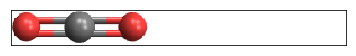

In [10]:
import matplotlib.image as img

import matplotlib.pyplot as pp

 

fileName = "C:\\Users\\sean5\\Downloads\\56.gif"

 

ndarray = img.imread(fileName)

#pp.axis('off')
pp.xticks([])
pp.yticks([])
 

pp.imshow(ndarray)

pp.show()

